In [ ]:
from environment import utils, Environment
from importlib import reload
import matplotlib.pyplot as plt


from absl import flags
FLAGS = flags.FLAGS

import numpy as np

if not FLAGS.find_module_defining_flag('vega_obs', default=None): 
    flags.DEFINE_boolean('vega_obs', True, 'Include portfolio vega and hedging option vega in state variables (Default False)')
# set vega obs to True to include vega in state variables
FLAGS['vega_obs'].value = True
FLAGS.mark_as_parsed()
from importlib import reload
np.set_printoptions(precision=10, suppress=True)
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [2]:
from importlib import reload
from environment import lmmsabr
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=10, suppress=True)
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
reload(lmmsabr)

lmm = lmmsabr.LMMSABR(imm=True,tenor=5, resolution=126, tau=0.25,sim_time=0.25, swap_client_expiry=0.5, swap_hedge_expiry=0.25)
#lmm.sample_starting_conditions()
#lmm.prime()
#lmm.simulate(seed=2)
#lmm.get_swap_matrix()
#print(lmm.f_sim)
#lmm.compute_regression_betas()
# h_kwargs={'params':(0, 0,0,0)},g_kwargs={'params':(0, 0,0,0.1)})#
#lmm.sample_starting_conditions(random_curves=True, n_curves=2000)#,g_kwargs={'params':(0.04,0.1538,1.2447,0.0202)}, h_kwargs={'params':(1.1138, 0.0002,1.9833,0.3069)})
lmm.sample_starting_conditions(random_curves=True, n_curves=1000,rho_kwargs={'eta_range':(0.8,0.8), 'lambda_range':( 0.0121, 0.0121)},
                               theta_kwargs={'eta_range':(0.8,0.8), 'lambda_range':( 1, 1)}, g_kwargs={'params':(0.04,0.1538,1.2447,0.0202)}, h_kwargs={'params':(1.1138, 0.0002,1.9833,0.3069)})
lmm.prime()
#lmm.generate_episodes_imm(1000, out_dir='data/stress')
# print("priming")



t_max set to 5.75
creating df init for n_curves=1000
done creating df_init
sampling
Creating combined covariance matrix...


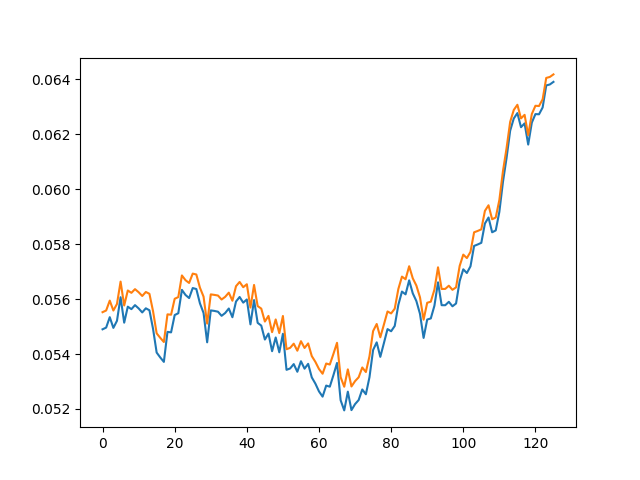

In [72]:
lmm.simulate()
lmm.get_swap_matrix()
plt.plot(lmm.swap_sim)
plt.show()


In [ ]:
lmm.compute_regression_betas()

In [ ]:
from environment.lmmsabr import make_nss_yield_df, compute_6m_forward_dataframe
import environment.lmmsabr as lmmsabr


In [155]:
reload(lmmsabr)
lmm = lmmsabr.LMMSABR(imm=True,tenor=5, resolution=126,sim_time=1, swap_client_expiry=2, swap_hedge_expiry=1)
df = compute_6m_forward_dataframe(make_nss_yield_df()).iloc[[0]]
df[:] = 0.06

lmm.sample_starting_conditions(df,h_kwargs={'params':(0, 0,0,0)},
                               g_kwargs={'params':(0, 0,0,0.05)},
                               rho_kwargs={'eta_range':(0.95,0.95), 'lambda_range':( 0.0121, 0.0121)},
                               theta_kwargs={'eta_range':(0.90,0.90), 'lambda_range':( 0.1, 0.1)})#,rho_kwargs={'beta_range':(0,0.01), 'gamma_range':(1e3,1e3)})
lmm.prime()
lmm.simulate()
lmm.get_swap_matrix()
(swpt_h, swp_h), (swpt_l, swp_l) = lmm.get_sabr_params_imm()
swpt_h[:,:,0]
0

t_max set to 8
n_curves is none, setting n_curves to n_samples=1
random_curves set to False, using the first n_curves of the dataframe
creating df init for n_curves=1
done creating df_init
sampling
Creating combined covariance matrix...


/home/hedge/gamma-vega-rl-hedging/environment/lmmsabr.py:1347: RuntimeWarning: covariance is not positive-semidefinite.
  all_shocks = rng.multivariate_normal(np.zeros(2 * m), self.sigma_big*dt_sub, (n * self.sub_steps)) # Z @ self._L


0

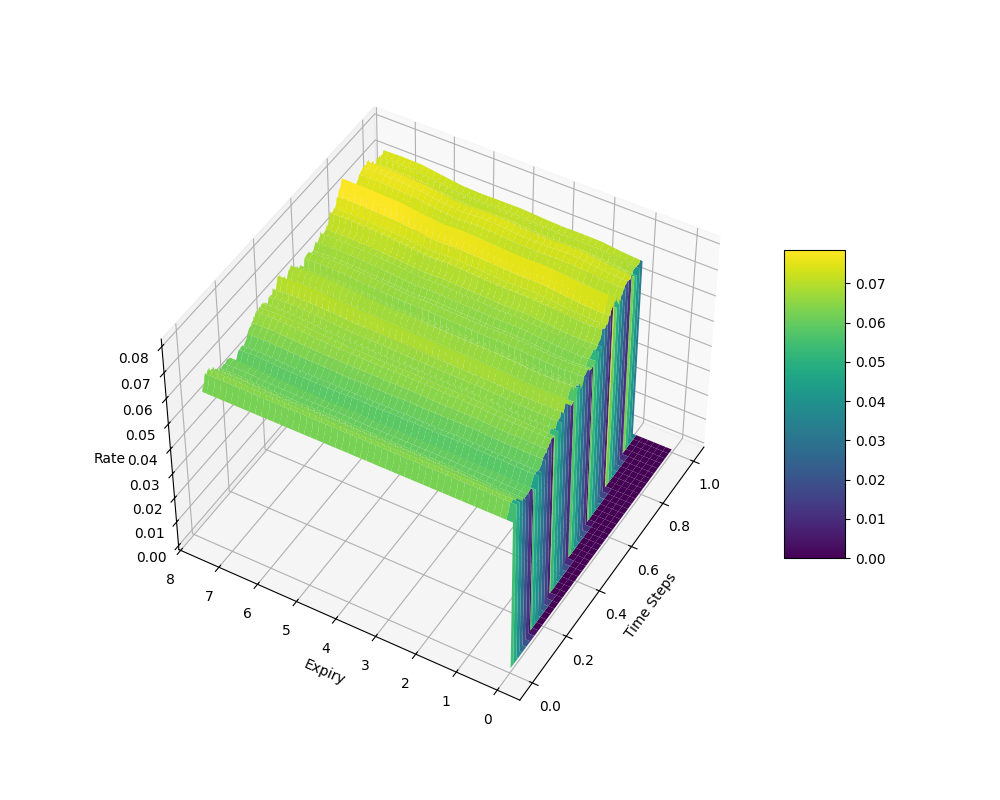

In [146]:
fplot = lmm.interp_func(lmm.f_sim)
fplot[np.tril_indices_from(lmm.f_sim,k=-1)] = 0

lmm.plot(fplot)
#lmm.plot(lmm.rho_mat)

In [157]:
lmm.generate_episodes_imm(500, out_dir='data/minimal')

/home/hedge/gamma-vega-rl-hedging/environment/lmmsabr.py:1347: RuntimeWarning: covariance is not positive-semidefinite.
  all_shocks = rng.multivariate_normal(np.zeros(2 * m), self.sigma_big*dt_sub, (n * self.sub_steps)) # Z @ self._L
Generating episode blocks: 100%|██████████| 1/1 [00:30<00:00, 30.92s/block]


All episodes streamed to disk in 'data/minimal/20250512-012428_5y_500'.
LMMM samples list of dicts saved to 'data/minimal/20250512-012428_5y_500/lmm_samples.pkl'.


'data/minimal/20250512-012428_5y_500'

In [ ]:
lmm = lmmsabr



In [ ]:
lmm.compute_regression_betas_imm()

AttributeError: 'LMMSABR' object has no attribute 's_mat_interp'

In [70]:
import cProfile
import pstats
import io
import numpy as np
from environment.lmmsabr import make_nss_yield_df, compute_6m_forward_dataframe
import environment.lmmsabr as lmmsabr
from importlib import reload
np.set_printoptions(precision=10, suppress=True)
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

reload(lmmsabr)
lmm = lmmsabr.LMMSABR(imm=True,tenor=5, resolution=126,sim_time=1, swap_client_expiry=2, swap_hedge_expiry=1)
print(lmm.f_sim.shape)
#lmm.sample_starting_conditions()
#lmm.prime()
#lmm.get_sabr_params_imm(hed_idx=0, liab_idx=4)




def profile_func():
    profiler = cProfile.Profile()
    profiler.enable()
    lmm.sample_starting_conditions()
    lmm.prime()
    lmm.simulate()
    lmm.get_swap_matrix()
    profiler.disable()
    s = io.StringIO()
    ps = pstats.Stats(profiler, stream=s)
    ps.sort_stats('cumulative')
    # Print top 20 lines
    ps.print_stats(20)
    print(s.getvalue())
#lmm.simulate()
profile_func()
lmm.get_sabr_params_imm()
0

t_max set to 8
(252, 2017)
n_curves is none, setting n_curves to n_samples=1
random_curves set to False, using the first n_curves of the dataframe
creating df init for n_curves=1
done creating df_init
sampling
Creating combined covariance matrix...
         8155457 function calls (7892340 primitive calls) in 6.624 seconds

   Ordered by: cumulative time
   List reduced from 3297 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.007    0.007    3.384    3.384 /home/hedge/gamma-vega-rl-hedging/environment/lmmsabr.py:1158(prime)
        1    0.580    0.580    3.141    3.141 /home/hedge/gamma-vega-rl-hedging/environment/lmmsabr.py:1223(precompute_gg_and_ggh_tensor)
        1    0.000    0.000    2.456    2.456 /home/hedge/gamma-vega-rl-hedging/environment/lmmsabr.py:1050(sample_starting_conditions)
427211/326330    0.294    0.000    2.091    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
    

0

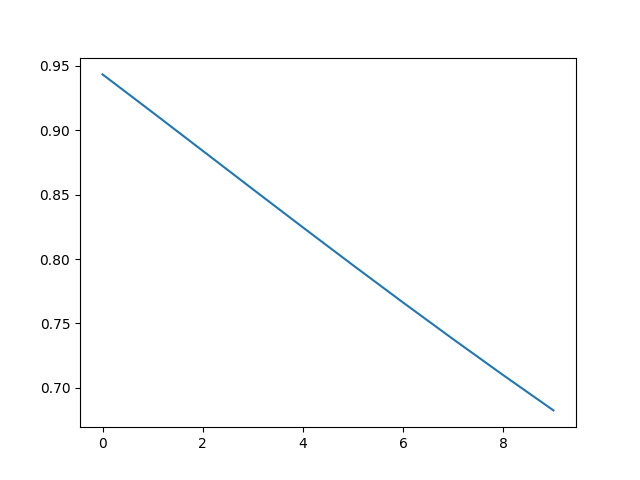

In [89]:

plt.plot(lmm.P[0,lmm.swap_indices[1][0,0]])#-lmm.annuity[0,0]*lmm.w_t[0,0]*2
plt.show()

In [102]:
idxs = lmm.swap_indices
inst_vol = lmm.swap_indexer(lmm.f_sim**lmm.beta)*lmm.swap_indexer(lmm.k_mat) * lmm.swap_indexer(lmm.g_mat)
inst_vol_w = inst_vol*lmm.w_t
rho_broadcast = lmm.rho_mat[idxs[1][:,0,:, None],idxs[1][:,1, None,:]]
cov = np.sum(inst_vol_w[:,0,:,None]* inst_vol_w[:,1,None,:] * rho_broadcast, axis=(1,2))
rho_broadcast_hed = lmm.rho_mat[idxs[1][:,0,:, None],idxs[1][:,0, None,:]]
rho_broadcast_liab = lmm.rho_mat[idxs[1][:,1,:, None],idxs[1][:,1, None,:]]
var_hed = np.sum(inst_vol_w[:,0,:,None]*inst_vol_w[:,0,None,:]*rho_broadcast_hed, axis=(1,2))
var_liab = np.sum(inst_vol_w[:,1,:,None]*inst_vol_w[:,1,None,:]*rho_broadcast_liab, axis=(1,2))
beta_hed = cov/var_hed
beta_liab = cov/var_liab
np.column_stack((beta_hed, beta_liab))

array([[0.9985692791, 0.9977230644],
       [0.9989249043, 0.9973970248],
       [0.9989682223, 0.9973579812],
       [0.9985821675, 0.9977254017],
       [0.9997585029, 0.9965330607],
       [0.9979494147, 0.9983435177],
       [0.9980556567, 0.9982416857],
       [0.9978636773, 0.998447677 ],
       [0.9997752531, 0.9965380629],
       [0.9996366285, 0.9966629053],
       [0.9994892556, 0.9967904697],
       [0.9971522465, 0.9991379404],
       [0.9988877746, 0.9974244823],
       [1.0001978157, 0.9961323748],
       [1.0012806494, 0.9950654441],
       [1.0015547509, 0.9947847047],
       [1.0010858632, 0.9952522734],
       [1.002771821 , 0.9935817017],
       [1.0016211547, 0.9947361457],
       [1.0014338655, 0.9948946592],
       [1.0014440466, 0.9948829709],
       [1.0027317478, 0.9936116166],
       [1.0024207658, 0.9938983169],
       [1.0002373063, 0.9960851848],
       [0.9992446259, 0.9970805855],
       [1.0000562744, 0.9963004757],
       [1.0009436262, 0.9954307547],
 

In [101]:
beta_hed



array([0.9985692791, 0.9989249043, 0.9989682223, 0.9985821675, 0.9997585029, 0.9979494147, 0.9980556567, 0.9978636773, 0.9997752531, 0.9996366285, 0.9994892556, 0.9971522465, 0.9988877746, 1.0001978157, 1.0012806494, 1.0015547509, 1.0010858632, 1.002771821 , 1.0016211547, 1.0014338655, 1.0014440466, 1.0027317478, 1.0024207658, 1.0002373063, 0.9992446259, 1.0000562744, 1.0009436262, 1.0014179575, 1.002396784 , 1.0024458294, 1.0020521739, 1.0039408632, 1.00402139  , 1.0039061422, 1.0030277609, 1.0043412369, 1.0023521936, 1.0008615474, 1.0003173932, 1.0023979421, 1.0016430278, 0.99919676  , 1.0018081675, 1.0033848908, 1.0026039316, 1.0014291479, 1.0028648432, 1.0045480483, 1.003871691 , 1.0043691145, 1.0066790093, 1.0061867856, 1.0064755089, 1.007027599 , 1.0079109227, 1.008035546 , 1.0097166536, 1.0111049122, 1.0100051491, 1.0110260435, 1.0111180614, 1.0108395886, 1.0103644684, 1.0125895107, 1.0150624803, 1.0166828414, 1.018014425 , 1.0188420003, 1.0204288469, 1.0210951113, 1.0207575242,

In [ ]:

lmm.get_swap_matrix()
0
#lmm.G_tensor[:,0,:,0]
lmm.swap_indices[1].shape

In [12]:
def profile_simulations(n=1000):
    profiler = cProfile.Profile()
    profiler.enable()
    for _ in range(n):
        lmm.simulate()
        lmm.get_swap_matrix()
        (sph, swh), (spl, swl) = lmm.get_sabr_params_imm(0,1)
    profiler.disable()
    s = io.StringIO()
    ps = pstats.Stats(profiler, stream=s)
    ps.sort_stats('cumulative')
    # Print top 20 lines
    ps.print_stats(20)
    print(s.getvalue())
profile_simulations()
0

         3734041 function calls (3650041 primitive calls) in 47.501 seconds

   Ordered by: cumulative time
   List reduced from 427 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     1000    3.785    0.004   32.502    0.033 /home/hedge/gamma-vega-rl-hedging/environment/lmmsabr.py:1476(get_sabr_params_imm)
     2000    1.070    0.001   26.390    0.013 /home/hedge/gamma-vega-rl-hedging/environment/lmmsabr.py:1553(risk_metrics)
178000/112000    2.620    0.000   15.637    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
     2000    3.784    0.002   13.897    0.007 /home/hedge/gamma-vega-rl-hedging/environment/lmmsabr.py:1805(black_swaption_price)
     1000    0.147    0.000   11.007    0.011 /home/hedge/gamma-vega-rl-hedging/environment/lmmsabr.py:1435(get_swap_matrix)
     6000    1.829    0.000    9.537    0.002 /home/hedge/venv/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2044(cdf

0

In [9]:

#lmm.get_swap_matrix()
#print(lmm.f_sim.shape)
#lmm.plot(lmm.k_mat*lmm.g_mat)
lmm.simulate()
lmm.get_swap_matrix()
(sph, swh), (spl, swl) = lmm.get_sabr_params_imm(0,1)
#lmm.plot(lmm.f_sim)
0

swh[:,:,0]

(251, 54)


array([[ 0.          ],
       [-0.0006761737],
       [-0.0087896688],
       [-0.0119605365],
       [-0.0161983735],
       [-0.0220979263],
       [-0.0138771341],
       [-0.0088523024],
       [-0.0106234501],
       [-0.0136756555],
       [-0.0171930244],
       [-0.0139905184],
       [-0.020382474 ],
       [-0.0310178225],
       [-0.0322445719],
       [-0.0359874574],
       [-0.030866128 ],
       [-0.0348781939],
       [-0.0399704149],
       [-0.0361077889],
       [-0.0392543881],
       [-0.046647972 ],
       [-0.0491954827],
       [-0.0455057877],
       [-0.0386550936],
       [-0.0396069555],
       [-0.0387674792],
       [-0.035321648 ],
       [-0.035563759 ],
       [-0.034928496 ],
       [-0.037636316 ],
       [-0.0345575804],
       [-0.025195954 ],
       [-0.0294732803],
       [-0.0355702868],
       [-0.0265347631],
       [-0.0260613087],
       [-0.0312626074],
       [-0.0347244625],
       [-0.0298071287],
       [-0.0342253514],
       [-0.03842

In [10]:
data = lmm.get_sabr_params_imm()

[[1.           1.0833333333 1.1666666667 1.25         1.3333333333 1.4166666667 1.5          1.5833333333 1.6666666667 1.75         1.8333333333 1.9166666667 2.           2.0833333333 2.1666666667 2.25         2.3333333333 2.4166666667 2.5          2.5833333333 2.6666666667 2.75         2.8333333333 2.9166666667]
 [0.9166666667 1.           1.0833333333 1.1666666667 1.25         1.3333333333 1.4166666667 1.5          1.5833333333 1.6666666667 1.75         1.8333333333 1.9166666667 2.           2.0833333333 2.1666666667 2.25         2.3333333333 2.4166666667 2.5          2.5833333333 2.6666666667 2.75         2.8333333333]
 [0.8333333333 0.9166666667 1.           1.0833333333 1.1666666667 1.25         1.3333333333 1.4166666667 1.5          1.5833333333 1.6666666667 1.75         1.8333333333 1.9166666667 2.           2.0833333333 2.1666666667 2.25         2.3333333333 2.4166666667 2.5          2.5833333333 2.6666666667 2.75        ]
 [0.75         0.8333333333 0.9166666667 1.           1

In [ ]:
lmm.generate_episodes(out_dir='data/minimal', n_episodes=1000)

In [ ]:
lmm.simulate()
lmm.get_swap_matrix()
print(lmm.swap_sim.shape)
lmm.plot(lmm.f_sim)
lmm.compute_regression_betas()

In [ ]:
lmm.simulate()
lmm.get_swap_matrix()
spt = lmm.sabr_structured_data().hedge.swaption
spt_l = lmm.sabr_structured_data().liability.swaption
swp = lmm.sabr_structured_data().hedge.swap
#plt.plot(swp.rate[:,0])
diag_idx = np.arange(30)
betas = lmm.compute_regression_betas()[diag_idx,diag_idx]
#plt.plot(np.ones(len(swp.rate[:,0]))*swp.rate[0,0])
#plt.plot(1e6*0.02*spt.price[diag_idx,diag_idx]*spt_l.gamma[diag_idx,diag_idx]/spt.gamma[diag_idx,diag_idx]*betas)
#plt.plot(1e6*spt.vega[diag_idx,diag_idx]*0.02)
#plt.plot(spt.vega[:,0])
plt.plot(spt.iv[diag_idx,diag_idx])
#plt.plot(spt.gamma[:,0]/20000)
plt.show()

In [ ]:
#plt.plot(spt.price[diag_idx,diag_idx])
plt.plot(np.cumsum(spt.pnl[:,0])-np.cumsum(spt_l.pnl[:,0]))
plt.show()

In [ ]:
plt.plot(spt.price[diag_idx,diag_idx]*100*10)
#plt.plot(spt.iv[diag_idx,diag_idx])
#plt.plot(swp.annuity[diag_idx,diag_idx])
plt.show()

In [ ]:
plt.plot(swp.annuity[diag_idx,diag_idx])
plt.plot(spt.iv[diag_idx,diag_idx])
#plt.show()
lmm.s_mat

In [ ]:
0.0572133601629593
#print(spt.price)

In [ ]:
lmm.plot(lmm.f_sim[:52])

In [ ]:

lmm.s_mat_interp[:4,4:12]/lmm.s_mat_interp[:4,4:12][[0,1,2,3],[4,5,6,7]][:,None] *lmm.rho_mat[[4,5,6,7],4:12]
#print(lmm.rho_mat[[4,5,6,7]])
#print(lmm.W[steps, offset + steps, :])
SS = np.arange(4)
#print(lmm.swap_indices[1][SS,SS,:])
#print(lmm.swap_indices[1])
print(lmm.rho_mat[lmm.swap_indices[1][SS,None,SS,:,None], lmm.swap_indices[1][:, :, None, :]][0,1])

In [ ]:
lmm.swap_indices[1][SS,None,SS,:,None][0]

In [ ]:
lmm.swap_indices[1][:, :, None, :][0,1]

In [ ]:
lmm.rho_mat[4:7,4:]

In [ ]:
import cloudpickle
path = '/home/hedge/gamma-vega-rl-hedging/data/calm/20250507-101913_1y/lmm_samples.pkl'
with open(path, 'rb') as f:
    data = cloudpickle.load(f)

In [ ]:
ttm_mat = lmm.ttm_mat[np.ix_(lmm.swap_idxs[0],lmm.swap_idxs[1])].copy()
ttm_mat[np.triu_indices_from(ttm_mat,k=53)] = 0
ttm_mat

In [ ]:
from matplotlib import pyplot as plt


In [ ]:
(swaption_hedge, swap_hedge), (swaption_liab, swap_liab) = lmm.get_sabr_params()

In [ ]:
lmm.get_swap_matrix()
#print(lmm.swap_indices[1][0,0])
#print(lmm.swap_indices[1][0,:])
lmm.swap_indexer(lmm.s_mat_interp)[0,0]*lmm.W[0,0]
(lmm.swap_indexer(lmm.s_mat_interp)[0,:]*lmm.W[0,:]).shape

In [ ]:
import pandas as pd 
time = '062817'
df = pd.read_csv(f'/home/hedge/gamma-vega-rl-hedging/logs/run_20250508_{time}/RL/Huber/spread=0.005_obj=cvar_threshold=0.95_critic=qr-huber_v=0.3_hedttm=30/logs/learner/logs.csv')
df_train = pd.read_csv(f'/home/hedge/gamma-vega-rl-hedging/logs/run_20250508_{time}/RL/Huber/spread=0.005_obj=cvar_threshold=0.95_critic=qr-huber_v=0.3_hedttm=30/logs/train_loop/logs.csv'
                    )

import matplotlib.pyplot as plt
df['policy_loss'].plot()
plt.legend()
plt.show()

df['critic_loss'].plot()
plt.legend()
#df_train['episode_return'].plot()

In [ ]:
df_gamma_spread5 = pd.read_csv('/home/hedge/gamma-vega-rl-hedging/logs/greekhedge_spread=0.05/logs/eval_env/logs.csv')
df_gamma_spread0 = pd.read_csv('/home/hedge/gamma-vega-rl-hedging/logs/greekhedge_spread=0.0/logs/eval_env/logs.csv')

In [ ]:
import seaborn as sns
df_gamma_spread5 = pd.read_csv('/home/hedge/gamma-vega-rl-hedging/logs/greekhedge_spread=0.05/logs/eval_env/logs.csv')
df_gamma_spread0 = pd.read_csv('/home/hedge/gamma-vega-rl-hedging/logs/greekhedge_spread=0.0/logs/eval_env/logs.csv')
plt.clf()
sns.histplot(df_gamma_spread5.groupby('episode').aggregate('sum')['step_pnl'], kde=True)
sns.histplot(df_gamma_spread0.groupby('episode').aggregate('sum')['step_pnl'], kde=True, alpha=0.5)
#df_gamma_spread5[]
plt.show()

In [ ]:
(df_gamma_spread5.groupby('episode').aggregate('sum')['step_pnl'] -df_gamma_spread0.groupby('episode').aggregate('sum')['step_pnl']).mean()

In [ ]:
df_gamma_spread5.groupby('episode').aggregate('sum')['cost_swaption']

In [ ]:
import numpy as np

# 1) Get your 2-leg indices
idx       = lmm.swap_indices[1]      # shape (52,104,2)
idx_main  = idx[0, 0, :]             # shape (2,), e.g. [52,78]
idx_port  = idx[0, :, :]             # shape (104,2)

# 2) Expand to (104,2,2) so each [j,i,k] pairs main-leg i with port-leg k
idx_main_exp = np.broadcast_to(idx_main[None, :, None], (104, 2, 2))
idx_port_exp = np.broadcast_to(idx_port[:, None, :],    (104, 2, 2))

# 3) Grab the 4×104 correlations
corr = lmm.rho_mat                  # shape (N,N)
corr_block = corr[idx_main_exp, idx_port_exp]  # (104,2,2)

# 4) Volatilities: take row-0 of your simulated matrix, then expand
sigma0         = lmm.s_mat_interp[0]            # shape (N,)
sigma_main_exp = np.broadcast_to(sigma0[idx_main][None,:,None], (104,2,2))
sigma_port_exp = np.broadcast_to(sigma0[idx_port][:,:,None],      (104,2,2))

# 5) Weights: pull main and port legs, then expand
w_main         = lmm.W[0, 0, :]                 # shape (2,)
w_port         = lmm.W[0, :, :]                 # shape (104,2)
w_main_exp     = np.broadcast_to(w_main[None,:,None], (104,2,2))
w_port_exp     = np.broadcast_to(w_port[:,:,None],    (104,2,2))

# 6) Element-wise multiply all four terms and sum over legs
cov_contrib = corr_block \
            * sigma_main_exp * sigma_port_exp \
            * w_main_exp     * w_port_exp       # shape (104,2,2)

# collapse the two inner axes → one covariance per portfolio swap
covs = cov_contrib.sum(axis=(1,2))               # shape (104,)

# covs[j] is Cov( swap(0,0), swap(0,j) ), including all four cross-terms
regs = covs/(covs[0])
#plt.plot(lmm.s_mat_interp[0,52:]/lmm.s_mat_interp[0,52])
#plt.show()
regs

In [ ]:
import numpy as np

# 1) Get your 2-leg indices
step = 1
idx       = lmm.swap_indices[1]      # shape (52,104,2)
idx_main  = idx[0, step, :]             # shape (2,), e.g. [52,78]
idx_port  = idx[0, :, :]             # shape (104,2)

# 2) Expand to (104,2,2) so each [j,i,k] pairs main-leg i with port-leg k
idx_main_exp = np.broadcast_to(idx_main[None, :, None], (104, 2, 2))
idx_port_exp = np.broadcast_to(idx_port[:, None, :],    (104, 2, 2))

# 3) Grab the 4×104 correlations
corr = lmm.rho_mat                  # shape (N,N)
corr_block = corr[idx_main_exp, idx_port_exp]  # (104,2,2)

# 4) Volatilities: take row-0 of your simulated matrix, then expand
sigma0         = lmm.s_mat_interp[step]            # shape (N,)
sigma_main_exp = np.broadcast_to(sigma0[idx_main][None,:,None], (104,2,2))
sigma_port_exp = np.broadcast_to(sigma0[idx_port][:,:,None],      (104,2,2))

# 5) Weights: pull main and port legs, then expand
w_main         = lmm.W[step, step, :]                 # shape (2,)
w_port         = lmm.W[step, :, :]                 # shape (104,2)
w_main_exp     = np.broadcast_to(w_main[None,:,None], (104,2,2))
w_port_exp     = np.broadcast_to(w_port[:,:,None],    (104,2,2))

# 6) Element-wise multiply all four terms and sum over legs
cov_contrib = corr_block \
            * sigma_main_exp * sigma_port_exp \
            * w_main_exp     * w_port_exp       # shape (104,2,2)

# collapse the two inner axes → one covariance per portfolio swap
covs = cov_contrib.sum(axis=(1,2))               # shape (104,)

# covs[j] is Cov( swap(0,0), swap(0,j) ), including all four cross-terms
regs = covs/(covs[step])
#plt.plot(lmm.s_mat_interp[0,52:]/lmm.s_mat_interp[0,52])
#plt.show()
regs

In [ ]:
import pickle

file_path = '/home/hedge/gamma-vega-rl-hedging/data/swaption_memmap/20250418-135858/lmm_samples.pkl'

try:
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    print(f"Successfully loaded data from {file_path}")
    # You can now work with the 'data' variable
    # For example, print its type or content (be careful with large files)
    # print(type(data))
    # print(data)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred while loading the pickle file: {e}")


In [ ]:
import numpy as np

# 0) unpack
idx        = lmm.swap_indices[1]    # shape (S,J,2)
rho        = lmm.rho_mat            # shape (N,N)
sigma_all  = lmm.s_mat_interp       # shape (S,N)
f_all      = lmm.f_sim              # shape (S,N)
beta       = lmm.beta               # scalar
W_all      = lmm.W                  # shape (S,J,2)

# dimensions
S, J = idx.shape[0], idx.shape[1]
steps = np.arange(S)

# 1) main/port indices
#    main_idx[s] = the two forwards for swap(s,s)
main_idx = idx[steps, steps, :]     # shape (S,2)
#    port_idx[s,j] = the two forwards for swap(s,j)
port_idx = idx                      # shape (S,J,2)

# 2) build 4-corners index blocks of shape (S,J,2,2)
main_exp = np.broadcast_to(
    main_idx[:, None, :, None],     # (S,1,2,1)
    (S, J, 2, 2)
)
port_exp = np.broadcast_to(
    port_idx[:, :, None, :],        # (S,J,1,2)
    (S, J, 2, 2)
)

# 3) gather all 4 correlations per (s,j)
rho_block = rho[main_exp, port_exp]  # → shape (S,J,2,2)

# 4) full forward vols = σ * (f^β)
vol_all = sigma_all * (f_all[:,:-26] ** beta)  # (S, N)

# 5) pull out & broadcast vols into (S,J,2,2)
vol_main_vec = vol_all[steps[:,None], main_idx]      # (S,2)
vol_port_vec = vol_all[steps[:,None,None], port_idx] # (S,J,2)

vol_main = np.broadcast_to(
    vol_main_vec[:, None, :, None],  # (S,1,2,1)
    (S, J, 2, 2)
)
vol_port = np.broadcast_to(
    vol_port_vec[:, :, :, None],     # (S,J,2,1)
    (S, J, 2, 2)
)

# 6) pull out & broadcast weights into (S,J,2,2)
w_main_vec = W_all[steps, steps, :]                # (S,2)
w_port_vec = W_all                                # (S,J,2)

w_main = np.broadcast_to(
    w_main_vec[:, None, :, None],  # (S,1,2,1)
    (S, J, 2, 2)
)
w_port = np.broadcast_to(
    w_port_vec[:, :, :, None],     # (S,J,2,1)
    (S, J, 2, 2)
)

# 7) build all 4 contributions & sum over the two “leg” axes
cov_contrib = rho_block * vol_main * vol_port * w_main * w_port  # (S,J,2,2)
covs_all    = cov_contrib.sum(axis=(2,3))                         # (S,J)

# 8) regression slopes: divide each row by its own var_main
var_main = covs_all[steps, 52+steps]         # (S,)
betas    = covs_all / var_main[:, None]   # (S,J)

# Now:
#   covs_all[s,j] is Cov(swap(s,s), swap(s,j))
#   betas[s,j]    is the OLS slope of swap(s,j) on swap(s,s)
betas
(rho_block*w_main *w_port ).sum(axis=(2,3))     

In [ ]:
import numpy as np

# 0) unpack
idx        = lmm.swap_indices[1]    # shape (S,J,2)
rho        = lmm.rho_mat            # shape (N,N)
sigma_all  = lmm.s_mat_interp       # shape (S,N)
f_all      = lmm.f_sim              # shape (S,N)
beta       = lmm.beta               # scalar
W_all      = lmm.W                  # shape (S,J,2)

# dimensions
S, J = idx.shape[0], idx.shape[1]
steps = np.arange(S)

# 1) main/port indices
#    main_idx[s] = the two forwards for swap(s,s)
main_idx = idx[steps, steps, :]     # shape (S,2)
#    port_idx[s,j] = the two forwards for swap(s,j)
port_idx = idx                      # shape (S,J,2)

# 2) build 4-corners index blocks of shape (S,J,2,2)
main_exp = np.broadcast_to(
    main_idx[:, None, :, None],     # (S,1,2,1)
    (S, J, 2, 2)
)
port_exp = np.broadcast_to(
    port_idx[:, :, None, :],        # (S,J,1,2)
    (S, J, 2, 2)
)

# 3) gather all 4 correlations per (s,j)
#rho_block = rho[main_exp, port_exp]  # → shape (S,J,2,2)
rho_block = lmm.theta_mat[main_exp, port_exp]
# 4) full forward vols = σ * (f^β)
#vol_all = sigma_all * (f_all[:,:-26] ** beta)  # (S, N)
vol_all = lmm.h_mat

# 5) pull out & broadcast vols into (S,J,2,2)
vol_main_vec = vol_all[steps[:,None], main_idx]      # (S,2)
vol_port_vec = vol_all[steps[:,None,None], port_idx] # (S,J,2)

vol_main = np.broadcast_to(
    vol_main_vec[:, None, :, None],  # (S,1,2,1)
    (S, J, 2, 2)
)
vol_port = np.broadcast_to(
    vol_port_vec[:, :, :, None],     # (S,J,2,1)
    (S, J, 2, 2)
)

# 6) pull out & broadcast weights into (S,J,2,2)
w_main_vec = W_all[steps, steps, :]                # (S,2)
w_port_vec = W_all                                # (S,J,2)

w_main = np.broadcast_to(
    w_main_vec[:, None, :, None],  # (S,1,2,1)
    (S, J, 2, 2)
)
w_port = np.broadcast_to(
    w_port_vec[:, :, :, None],     # (S,J,2,1)
    (S, J, 2, 2)
)

# 7) build all 4 contributions & sum over the two “leg” axes
cov_contrib = rho_block * vol_main * vol_port * w_main * w_port  # (S,J,2,2)

covs_all    = cov_contrib.sum(axis=(2,3))                         # (S,J)

# 8) regression slopes: divide each row by its own var_main
var_main = covs_all[steps,52+ steps]         # (S,)
betas    = covs_all / var_main[:, None]   # (S,J)

# Now:
#   covs_all[s,j] is Cov(swap(s,s), swap(s,j))
#   betas[s,j]    is the OLS slope of swap(s,j) on swap(s,s)
betas

In [ ]:
def covs_and_betas(lmm, vol_shift: int = -26):
    """Return instantaneous swap covariances and one‑factor betas.

    Parameters
    ----------
    lmm : object
        Must expose the attributes used below (same interface as the original
        script):
            • swap_indices  – ndarray (S,J,2) with the two forward indices that
              build each swap (s,j).
            • rho_mat       – correlation matrix (N,N) between forward rates.
            • s_mat_interp  – local volatilities σ_s,n (S,N).
            • f_sim         – forward levels F_s,n (S,N).
            • beta          – CEV/SABR exponent β (scalar).
            • W             – cash‑flow weights w_{s,j,k} (S,J,2).
    vol_shift : int, optional
        The slice on the forward‑columns to align σ & F with the swap indices
        (legacy quirk from the original code).  Default is -26 (keep original
        behaviour).

    Returns
    -------
    covs : ndarray, shape (S,J)
        Covariance Cov[S_{s,s}, S_{s,j}] for every time‑step s and portfolio
        index j.
    betas : ndarray, shape (S,J)
        OLS beta of S_{s,j} regressed on S_{s,s}.
    """
    # 0) unpack ----------------------------------------------------------------
    idx        = lmm.swap_indices[1]           # (S,J,2)
    rho        = lmm.rho_mat                # (N,N)
    sigma_all  = lmm.s_mat_interp           # (S,N)
    f_all      = lmm.f_sim                  # (S,N)
    beta_exp   = lmm.beta                  # scalar β in σ·F^β
    W_all      = lmm.W                      # (S,J,2)

    S, J = idx.shape[:2]
    steps = np.arange(S)

    # 1) forward‑rate vols σ · F^β -------------------------------------------
    vol = sigma_all * f_all[:, :vol_shift] ** beta_exp   # (S,N)

    # 2) helper indices --------------------------------------------------------
    main_idx = idx[steps, steps]                   # (S,2)

    # 3) vector of weights×vols for main swap legs ----------------------------
    a = vol[steps, main_idx] * W_all[steps, steps]         # (S,2)

    # 4) vector of weights×vols for all portfolio swaps -----------------------
    b = vol[steps[:, None], idx] * W_all                    # (S,J,2)

    # 5) 2×2 correlation blocks between the four forward legs -----------------
    rho_block = rho[main_idx[:, :, None], idx]              # (S,J,2,2)

    # 6) covariance matrix in a single einsum ---------------------------------
    covs = np.einsum('sk,sjkl,sjl->sj', a, rho_block, b, optimize=True)  # (S,J)

    # 7) regression slopes (betas) --------------------------------------------
    var_main = covs[steps, steps]                # (S,)
    betas    = covs / var_main[:, None]          # (S,J)

    return covs, betas

def build_covs_and_betas(lmm):
    """Drop‑in replacement for the original eight‑step NumPy recipe."""
    covs, betas = covs_and_betas(lmm)
    return dict(covs_all=covs, betas=betas)
build_covs_and_betas(lmm)

In [ ]:
from environment import utils
reload(utils)
hedge_swaption, liab_swaption, _hedge_swap, liab_swap, liab_swaption_position, cov_hed_all, cov_liab_all, ttm_mat = utils.Utils().generate_swaption_market_data()
hedge_swap_ep = _hedge_swap[0]

In [ ]:
# import numpy as np
# np.set_printoptions(precision=4, suppress=True)
# np.set_printoptions(threshold=np.inf, linewidth=np.inf)

# #hedge_swap_ep[...,2]
liab_swaption_position[4]*100

In [ ]:
corr=0
for i in range(52):
    corr += (lmm.g(np.arange(105)/52)[104-i] / lmm.g(np.arange(105)/52)[52-i] * lmm.swap_sim[0+i,52]**0.5/lmm.swap_sim[0+i,0]**0.5)
np.mean(corr/52)

In [ ]:
lmm.rho_mat[0,52] * lmm.g(np.arange(105)/52)[104] / lmm.g(np.arange(105)/52)[52]#*lmm.swap_sim[0,52]**0.5/lmm.swap_sim[0,0]**0.5

In [ ]:
np.set_printoptions(precision=10, suppress=True)
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [ ]:
reload(utils)
reload(Environment)
util = utils.Utils()

env = Environment.TradingEnv(utils=util)
%load_ext autoreload
%autoreload 2

env.reset()

In [ ]:
env.portfolio.hed_port._base_options[...,Environment.Greek.DELTA]#*1_000_000*0.005

In [ ]:
env.portfolio.underlying.active_path_hed[...,Environment.SwapKeys.DELTA]

In [ ]:
import tensorflow as tf
S = tf.expand_dims(tf.stack([[1.,2.],[1.,1.]]),axis=0)
#print(S)
d = tf.expand_dims(tf.stack([[1.],[2.]]),axis=0)
#print(d)
weights = tf.unstack(tf.linalg.solve(S,d), axis=-1)
print(weights)

In [ ]:
from agent.agent import KernelLayer


delta_vec = env.portfolio.get_delta_vec(env.t)[None,:]
delta_vec2 = env.portfolio.get_delta_vec(env.t)[None,:]
#delta_vec = np.arange(10)[None,:]
#delta_vec2 = np.arange(105)[None,:]
delta_block_np = np.column_stack([np.concatenate([delta_vec, delta_vec2]), np.ones(2).reshape(-1,1)])
delta_block = tf.convert_to_tensor(delta_block_np, dtype=tf.float32)
vol_kernel = KernelLayer()
vol_kernel(delta_block)

In [ ]:
#!/usr/bin/env python3
import tensorflow as tf
import tensorflow_probability as tfp

from agent.agent import KernelLayer, ObservationWithKernel

SAVED_OBS = (
  "/home/hedge/gamma-vega-rl-hedging/logs/"
  "run_20250423_155951/RL/Huber/"
  "spread=0.005_obj=cvar_threshold=0.95_critic=qr-huber_v=0.3_hedttm=30/"
  "observation_20250423_201213"
)

# 1) Rebuild exactly
vk = KernelLayer(name="vol_kernel",
                 a_scale=0.1, b_scale=0.3, c_scale=1.5, d_scale=0.1)
vvk = KernelLayer(name="volvol_kernel",
                  a_scale=1.5, b_scale=0.3, c_scale=3.0, d_scale=0.5)
obs_net = ObservationWithKernel(vol_kernel=vk, volvol_kernel=vvk,
                                name="observation_network")
_ = obs_net(tf.zeros([1, 323], tf.float32))   # build vars

# 2) Load snapshot (reads both saved_model.pb and variables/*)
loaded = tf.saved_model.load(SAVED_OBS)
raw_vars = loaded.trainable_variables
assert len(raw_vars) == 12, f"Expected 12 scalars, got {len(raw_vars)}"

# 3) Assign in creation order
param_names = ["a","b","beta","c","d","eta"]
targets = []
for layer in (vk, vvk):
    targets += [getattr(layer, p) for p in param_names]

for tgt, src in zip(targets, raw_vars):
    # tgt.variables[0] is the raw tf.Variable inside the TransformedVariable
    tgt.variables[0].assign(src.numpy())

print("✅ All weights restored.\n")

# 4) Print raw vs. clamped
sig = tfp.bijectors.Sigmoid()
print("=== Observation kernels after reload ===\n")
for layer in (vk, vvk):
    print(f"-- {layer.name} --")
    for p in param_names:
        tv = getattr(layer, p)
        raw     = tv.variables[0].numpy()
        constrained = tv.numpy()    # sigmoid→scale→shift
        print(f"{p:5s}  raw = {raw: .6f}   clamped = {constrained: .6f}")
    print()


In [ ]:

low_bounds = {'a': 0.00, 'b': 0.02, 'c': 0.5, 'd': 0.01}

In [ ]:

#print(env.t)
#env.step([0,1])[2]
env.portfolio.get_gamma(env.t)
env.portfolio.get_gamma_local_hed(env.t)
env.portfolio.get_vega

In [ ]:
tau_vals = np.arange(0, 2 + 1e-3, 1/52).astype(np.float32)
tau_vals.shape

In [ ]:
env.portfolio.get_delta_vec(env.t).shape[0]-env.portfolio.get_delta_vec(env.t).shape[0]/2

In [ ]:
from functools import partial
def get_instant_vol_func(tau_i , a,b,c,d):

    tau = np.maximum(tau_i, 0)
    instantaneous_vol = (a + b * tau) * np.exp(-c * tau) + d
    return instantaneous_vol

def doust_corr(tau_i,tau_j, eta, beta):
    return eta + (1-eta) * np.exp(-beta*np.abs(tau_i-tau_j))

def trainable_kernel(tau_i, tau_j, a, b, c, d, eta, beta):
    return doust_corr(eta, beta, tau_i,tau_j) * get_instant_vol_func(tau_j , a,b,c,d) / get_instant_vol_func(tau_i , a,b,c,d)
    


low_bounds = {'a': 0.00, 'b': 0.02, 'c': 0.5, 'd': 0.01}

ts = np.linspace(0,3,105+52) # 3 yers
#np.trapz()
T = ts[-1]
tau = T - ts
vols = get_instant_vol_func(ts,**low_bounds)
delta_kernel =  vols#[:,None]#/vols[52] # normalized to 1y marklt.plot(ts, )
# 3) instantaneous vols as function of tau
vol_tau = get_instant_vol_func(tau, **low_bounds)

# 4) square them
sq = vol_tau**2

# 5) for each index i, integrate σ^2 over [t_i, T] by integrating sq[i:] against ts[i:]
tail_vars = np.array([
    np.trapz(sq[i:], ts[i:])
    for i in range(len(ts)-1)   # we stop at i=len(ts)-2 to avoid dividing by zero
])

# 6) annualise forward vol on [t_i, T]:
#     forward_vol[i] = sqrt( ∫ₜᵢᵀ σ²(u) du  /  (T−t_i) )
forward_vol = np.sqrt(tail_vars / tau[:-1])

# 7) plot it **against** τ = time‐to‐expiry
plt.clf()
plt.plot(tau[:-1], forward_vol)
plt.plot(ts,delta_kernel)
plt.show()

In [ ]:
ts = np.arange(0,3,1/52) # 3 yers
ts[104]

In [ ]:
import numpy as np
import sonnet as snt
import tensorflow as tf
import tensorflow_probability as tfp

# Alias for bijectors
tfb = tfp.bijectors

class OneYearKernelLayer(snt.Module):
    """
    Sonnet module acting like a layer: takes a risk vector [T] and returns
    a single exposure scalar. Internally computes trainable kernel weights
    anchored at a fixed tenor (1y at index anchor_index).

    Usage:
        exposure = kernel_layer(risk_vector)

    Parameters a,b,c,d,eta,beta are constrained to (0,1) via Sigmoid bijector.
    """
    def __init__(self,
                 tenor_grid=None,
                 anchor_index=52,
                 init_params=None,
                 a_scale = 0.2,
                 b_scale=0.2,
                 c_scale = 1.5,
                 d_scale=0.5,

                 name=None):
        super().__init__(name=name)
        # Build tenor grid: default 0 to 3 years at 1/52
        if tenor_grid is None:
            tau_vals = np.arange(0, 2+1e-5, 1/52).astype(np.float32)
        else:
            tau_vals = np.array(tenor_grid, dtype=np.float32)
        self.tau_grid = tf.constant(tau_vals, dtype=tf.float32)
        self.anchor_index = anchor_index

        # Initial params in (0,1)
        defaults = init_params or {'a':0.5,'b':0.5,'c':1.,'d':0.001,'eta':0.5,'beta':0.5}
        sigmoid = tfb.Sigmoid()
        # Vol function params
        self.a    = tfp.util.TransformedVariable(defaults['a'],    sigmoid, name='a') * a_scale
        self.b    = tfp.util.TransformedVariable(defaults['b'],    sigmoid, name='b') * b_scale
        self.c    = tfp.util.TransformedVariable(defaults['c'],    sigmoid, name='c') * c_scale
        self.d    = tfp.util.TransformedVariable(defaults['d'],    sigmoid, name='d')*d_scale + 0.001
        # Correlation params
        self.eta  = tfp.util.TransformedVariable(defaults['eta'],  sigmoid, name='eta')*0.95
        self.beta = tfp.util.TransformedVariable(defaults['beta'], sigmoid, name='beta')*0.5

    def _compute_weights(self):
        """
        Compute the kernel weight vector [T]."""
        tau = self.tau_grid                             # [T]
        vols = (self.a + self.b * tau)*tf.exp(-self.c * tau) + self.d  # [T]
        vol_ref = vols[self.anchor_index]                # scalar
        tau_ref = tau[self.anchor_index]                 # scalar
        dist = tf.abs(tau - tau_ref)                     # [T]
        corr = self.eta + (1. - self.eta)*tf.exp(-self.beta * dist)  # [T]
        return corr * (vols / vol_ref)                   # [T]

    def __call__(self, risk_vector):
        """
        Args:
          risk_vector: 1D tensor [T] of risk sensitivities.
        Returns:
          scalar exposure.
        """
        weights = self._compute_weights()                # [T]
        plt.clf()
        plt.plot(weights)
        plt.show()
        return tf.reduce_sum(weights * risk_vector)      # scalar

In [ ]:
layer = OneYearKernelLayer()

In [ ]:
a1 = np.arange(10)[None,:]
a2 = np.arange(10)[None,:]
np.concatenate([a1,a2],axis=0)

In [ ]:
t=52
gv = np.arange(1,3+1e-3,1/52)[:53+t]
gt = np.zeros(105)
gt[52-t:] = gv

print(gt[:,None][52])

# Delta Hedging Solver and Portfolio Accounting Tests

This section contains tests to validate:
1. The delta hedging solver in `MainPortfolio.solve_delta_action`
2. The portfolio accounting functionality in the MainPortfolio class

In [82]:
from environment import utils, Environment
from environment.utils import Utils
from environment.Trading import Greek, SwapKeys
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

# Reload modules to ensure we have the latest code
reload(utils)
reload(Environment)

# Create a utility instance for testing
test_utils = Utils(n_episodes=10, tenor=4, spread=0.005)

# Initialize a TradingEnv environment for testing 
test_env = Environment.TradingEnv(utils=test_utils)
test_env.reset()

utils initiated with spread=0.005, poisson_rate=1, n_episodes=10

Memory usage before lmm: 2014.17 MB
t_max set to 5.75
!!!! CONTRACT SIZE IS  100.0

XXXXXXXXXXXXXXXXXXXXXX
 The spread is 0.005   
 nXXXXXXXXXXXXXXXXXXXXXX
Memory usage after: 2081.36 MB

Memory usage after gc: 2012.51 MB

TRAINING WITH LOGGER: False

Using  data/stress/20250512-154817_5y_1000 dataset
initializing classes
done initializing classes
Using  data/stress/20250512-154817_5y_1000 dataset
episode offset -1
Action stats - Mean: 0.0000, Std: 0.0000
Min: 0.0000, Max: 0.0000
Percentiles - p1: 0.0000, p5: 0.0000, p50: 0.0000, p95: 0.0000, p99: 0.0000
Clipped values - Min: 0.0000 (0.0%), Max: 0.0000 (0.0%)


array([     4.4002686   ,      0.0043469802,      3.9539225   , -71082.44        ,  37185.78        ,      0.25        ], dtype=float32)

In [ ]:
def test_delta_hedge_solver_fixed():
    """
    Test if the delta hedge solver correctly neutralizes delta exposures.
    
    This function tests the fixed solve_delta_action method by:
    1. Capturing the initial delta exposure
    2. Applying the solver's recommended actions
    3. Verifying that the resulting delta exposure is near zero
    4. Checking if subsequent hedge actions would be near zero
    """
    print("Testing fixed delta hedge solver...")
    
    # Reset the environment to start fresh
    test_env.reset()
    portfolio = test_env.portfolio
    
    # Test at different time steps
    test_steps = [0, 5, 10, 20, 30]
    results = []
    
    for t in test_steps:
        if t >= test_env.num_period:
            continue
            
        test_env.t = t
        
        # Get initial delta exposures
        delta_local_hed_before = portfolio.get_delta_local_hed(t)
        delta_local_liab_before = portfolio.get_delta_local_liab(t)
        
        # Solve for hedging actions
        action_swap_hed, action_swap_liab = portfolio.solve_delta_action(t)
        
        # Apply the actions (without affecting the environment)
        saved_pos_hed = portfolio.underlying.position_hed
        saved_pos_liab = portfolio.underlying.position_liab
        
        portfolio.underlying.add(t, action_swap_hed, action_swap_liab)
        
        # Measure delta exposure after hedging
        delta_local_hed_after = portfolio.get_delta_local_hed(t)
        delta_local_liab_after = portfolio.get_delta_local_liab(t)
        
        # Check if subsequent hedge actions would be near zero (indicating we're hedged)
        next_action_swap_hed, next_action_swap_liab = portfolio.solve_delta_action(t)
        
        # Restore original positions
        portfolio.underlying.position_hed = saved_pos_hed
        portfolio.underlying.position_liab = saved_pos_liab
        
        results.append({
            't': t,
            'delta_hed_before': delta_local_hed_before,
            'delta_hed_after': delta_local_hed_after,
            'delta_liab_before': delta_local_liab_before,
            'delta_liab_after': delta_local_liab_after,
            'action_swap_hed': action_swap_hed,
            'action_swap_liab': action_swap_liab,
            'next_action_swap_hed': next_action_swap_hed,
            'next_action_swap_liab': next_action_swap_liab
        })
        
    # Display results
    for r in results:
        print(f"Time step {r['t']}:")
        print(f"  Hedge delta:   Before={r['delta_hed_before']:.6f}, After={r['delta_hed_after']:.6f}")
        print(f"  Liability delta: Before={r['delta_liab_before']:.6f}, After={r['delta_liab_after']:.6f}")
        print(f"  Actions: Hedge Swap={r['action_swap_hed']:.6f}, Liab Swap={r['action_swap_liab']:.6f}")
        print(f"  Next actions: Hedge={r['next_action_swap_hed']:.6f}, Liab={r['next_action_swap_liab']:.6f}")
        
        # Check if delta is properly neutralized (close to zero)
        if abs(r['delta_hed_after']) > 1e-6 or abs(r['delta_liab_after']) > 1e-6:
            print(f"  WARNING: Delta not properly neutralized! Residual hedge={r['delta_hed_after']:.6e}, liab={r['delta_liab_after']:.6e}")
        else:
            print("  ✓ Delta successfully neutralized")
            
        # Check if subsequent actions are close to zero
        if abs(r['next_action_swap_hed']) > 1e-6 or abs(r['next_action_swap_liab']) > 1e-6:
            print(f"  WARNING: Subsequent hedge actions not close to zero! Hedge={r['next_action_swap_hed']:.6e}, Liab={r['next_action_swap_liab']:.6e}")
        else:
            print("  ✓ Subsequent hedge actions close to zero")
        print()
    
    return results

# Run the fixed test
test_delta_hedge_solver_fixed()

Testing delta hedge solver...
-0.0 0.00023057288152828636
-0.0 -1.5723591358472697e-05
-0.0 0.0001729667783611351
-0.0 8.672335599266745e-05
-0.0 -0.00010618207304580064
Time step 0:
  Hedge delta:   Before=-441.904771, After=-0.095838
  Liability delta: Before=-472.506714, After=-0.102475
  Actions: Hedge Swap=-0.000000, Liab Swap=0.000231

Time step 5:
  Hedge delta:   Before=-38.424338, After=0.006530
  Liability delta: Before=-40.953262, After=0.006960
  Actions: Hedge Swap=-0.000000, Liab Swap=-0.000016

Time step 10:
  Hedge delta:   Before=-473.300581, After=-0.072249
  Liability delta: Before=-502.372345, After=-0.076687
  Actions: Hedge Swap=-0.000000, Liab Swap=0.000173

Time step 20:
  Hedge delta:   Before=-523.017401, After=-0.035901
  Liability delta: Before=-559.353149, After=-0.038395
  Actions: Hedge Swap=-0.000000, Liab Swap=0.000087

Time step 30:
  Hedge delta:   Before=-276.421631, After=0.043349
  Liability delta: Before=-300.286133, After=0.047091
  Actions: Hedg

[{'t': 0,
  'delta_hed_before': -441.90477131960506,
  'delta_hed_after': -0.09583799976693065,
  'delta_liab_before': -472.5067138671875,
  'delta_liab_after': -0.10247478930415355,
  'action_swap_hed': -0.0,
  'action_swap_liab': 0.00023057288152828636},
 {'t': 5,
  'delta_hed_before': -38.42433756997161,
  'delta_hed_after': 0.006530084964004944,
  'delta_liab_before': -40.95326232910156,
  'delta_liab_after': 0.006959867091403282,
  'action_swap_hed': -0.0,
  'action_swap_liab': -1.5723591358472697e-05},
 {'t': 10,
  'delta_hed_before': -473.3005810806062,
  'delta_hed_after': -0.07224899938171558,
  'delta_liab_before': -502.3723449707031,
  'delta_liab_after': -0.07668678360442982,
  'action_swap_hed': -0.0,
  'action_swap_liab': 0.0001729667783611351},
 {'t': 20,
  'delta_hed_before': -523.0174005062363,
  'delta_hed_after': -0.03590057027674353,
  'delta_liab_before': -559.3531494140625,
  'delta_liab_after': -0.03839470164973591,
  'action_swap_hed': -0.0,
  'action_swap_liab'

In [ ]:
def test_portfolio_accounting():
    """
    Test the portfolio accounting functionality by tracking value changes and PnL.
    
    This function tests if:
    1. The portfolio correctly tracks changes in position value
    2. PnL calculations are consistent with value changes
    3. The step function properly updates all components
    """
    print("Testing portfolio accounting...")
    
    # Reset environment to start fresh
    test_env.reset()
    portfolio = test_env.portfolio
    
    # Series of actions to test (swaption positions at each step)
    test_actions = [0.1, 0.2, 0.0, -0.1, 0.0]
    time_steps = list(range(len(test_actions)))
    
    # Track values for validation
    values = []
    positions_swaption = []
    positions_swap_hed = []
    positions_swap_liab = []
    pnl_components = []
    
    # Run through a series of actions
    for t, action in enumerate(test_actions):
        if t >= test_env.num_period:
            break
            
        test_env.t = t
        
        # Record initial value
        initial_value = portfolio.get_value(t)
        
        # Create a StepResult object to capture PnL components
        result = Environment.StepResult(episode=test_env.sim_episode, t=t)
        
        # Apply swaption action (normalized to portfolio gamma)
        action_swaption = -action*portfolio.get_gamma_local_hed(t)/(
            portfolio.hed_port._base_options[t,t,Greek.GAMMA] * test_utils.contract_size)
        
        # Execute step
        pnl = portfolio.step(action_swaption_hed=action_swaption, t=t, result=result)
        
        # Solve and apply delta hedge
        action_swap_hed, action_swap_liab = portfolio.solve_delta_action(t)
        
        # Record positions after actions
        positions_swaption.append(portfolio.hed_port.get_current_position(t))
        positions_swap_hed.append(portfolio.underlying.position_hed)
        positions_swap_liab.append(portfolio.underlying.position_liab)
        
        # Record final value for this step
        final_value = portfolio.get_value(t)
        values.append({
            't': t,
            'initial': initial_value,
            'final': final_value,
            'change': final_value - initial_value,
            'reported_pnl': pnl,
        })
        
        # Record PnL components
        pnl_components.append({
            'total': pnl,
            'cost_swaption': result.cost_swaption_hed,
            'cost_swap_hed': result.cost_swap_hed,
            'cost_swap_liab': result.cost_swap_liab,
            'step_pnl_hed_swaption': result.step_pnl_hed_swaption,
            'step_pnl_liab_swaption': result.step_pnl_liab_swaption,
            'step_pnl_hed_swap': result.step_pnl_hed_swap,
            'step_pnl_liab_swap': result.step_pnl_liab_swap,
        })
    
    # Validate and display results
    print("\nPortfolio value tracking:")
    for v in values:
        print(f"Time {v['t']}: Initial={v['initial']:.6f}, Final={v['final']:.6f}")
        print(f"  Value change={v['change']:.6f}, Reported PnL={v['reported_pnl']:.6f}")
        if abs(v['change'] - v['reported_pnl']) > 1e-10:
            print(f"  WARNING: Value change doesn't match reported PnL! Diff={v['change'] - v['reported_pnl']:.6e}")
        else:
            print("  ✓ Value change matches reported PnL")
    
    print("\nPosition tracking:")
    for i, t in enumerate(time_steps):
        print(f"Time {t}: Swaption pos={positions_swaption[i]:.6f}, Swap hed={positions_swap_hed[i]:.6f}, Swap liab={positions_swap_liab[i]:.6f}")
    
    print("\nPnL Components:")
    for i, t in enumerate(time_steps):
        p = pnl_components[i]
        print(f"Time {t}: Total PnL={p['total']:.6f}")
        print(f"  Costs: Swaption={p['cost_swaption']:.6f}, Swap hed={p['cost_swap_hed']:.6f}, Swap liab={p['cost_swap_liab']:.6f}")
        print(f"  PnL: Hed swaption={p['step_pnl_hed_swaption']:.6f}, Liab swaption={p['step_pnl_liab_swaption']:.6f}")
        print(f"       Hed swap={p['step_pnl_hed_swap']:.6f}, Liab swap={p['step_pnl_liab_swap']:.6f}")
        
        # Verify that components sum to total
        component_sum = (p['cost_swaption'] + p['cost_swap_hed'] + p['cost_swap_liab'] +
                        p['step_pnl_hed_swaption'] + p['step_pnl_liab_swaption'] +
                        p['step_pnl_hed_swap'] + p['step_pnl_liab_swap'])
        if abs(component_sum - p['total']) > 1e-10:
            print(f"  WARNING: PnL components don't sum to total! Diff={component_sum - p['total']:.6e}")
        else:
            print("  ✓ PnL components sum to total")
    
    return {
        'values': values,
        'positions': {
            'swaption': positions_swaption,
            'swap_hed': positions_swap_hed,
            'swap_liab': positions_swap_liab
        },
        'pnl_components': pnl_components
    }

test_portfolio_accounting()

In [ ]:
def verify_delta_neutrality_over_time():
    """
    Test if delta hedging remains effective over multiple time steps.
    
    This function:
    1. Applies a swaption trade and delta hedges at step 0
    2. Holds the position and checks delta exposure at subsequent steps
    3. Verifies if the portfolio remains approximately delta neutral
    """
    print("Testing delta neutrality over time...")
    
    # Reset environment
    test_env.reset()
    portfolio = test_env.portfolio
    
    # Apply initial trade and hedge at step 0
    t = 0
    test_env.t = t
    
    # Initial swaption action (arbitrary position)
    action_swaption = 0.2
    
    # Record deltas before trade
    delta_before = portfolio.get_delta(t)
    delta_local_hed_before = portfolio.get_delta_local_hed(t)
    delta_local_liab_before = portfolio.get_delta_local_liab(t)
    
    # Apply swaption action and delta hedge
    result = Environment.StepResult(episode=test_env.sim_episode, t=t)
    portfolio.step(action_swaption_hed=action_swaption, t=t, result=result)
    
    # Solve and apply delta hedge
    action_swap_hed, action_swap_liab = portfolio.solve_delta_action(t)
    portfolio.underlying.add(t, action_swap_hed, action_swap_liab)
    
    # Record deltas after trade
    delta_after_trade = portfolio.get_delta(t)
    delta_local_hed_after_trade = portfolio.get_delta_local_hed(t)
    delta_local_liab_after_trade = portfolio.get_delta_local_liab(t)
    
    # Track deltas over time
    tracking_steps = 10
    time_steps = list(range(1, tracking_steps + 1))
    delta_values = []
    
    for t in time_steps:
        if t >= test_env.num_period:
            break
            
        test_env.t = t
        
        # Record deltas at this step without rehedging
        delta = portfolio.get_delta(t)
        delta_local_hed = portfolio.get_delta_local_hed(t)
        delta_local_liab = portfolio.get_delta_local_liab(t)
        
        delta_values.append({
            't': t,
            'delta': delta,
            'delta_local_hed': delta_local_hed,
            'delta_local_liab': delta_local_liab
        })
    
    # Print results
    print("Initial state (t=0):")
    print(f"  Delta before trade: Global={delta_before:.6f}, Hedge={delta_local_hed_before:.6f}, Liab={delta_local_liab_before:.6f}")
    print(f"  Delta after trade+hedge: Global={delta_after_trade:.6f}, Hedge={delta_local_hed_after_trade:.6f}, Liab={delta_local_liab_after_trade:.6f}")
    
    print("\nDelta drift over time (without rehedging):")
    for d in delta_values:
        print(f"  Time {d['t']}: Global={d['delta']:.6f}, Hedge={d['delta_local_hed']:.6f}, Liab={d['delta_local_liab']:.6f}")
        
    # Plot delta drift
    plt.figure(figsize=(10, 6))
    plt.plot(time_steps, [d['delta'] for d in delta_values], '-o', label='Global Delta')
    plt.plot(time_steps, [d['delta_local_hed'] for d in delta_values], '-o', label='Local Hedge Delta')
    plt.plot(time_steps, [d['delta_local_liab'] for d in delta_values], '-o', label='Local Liab Delta')
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
    plt.xlabel('Time Step')
    plt.ylabel('Delta')
    plt.title('Delta Drift Over Time After Initial Hedge')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return {
        'initial': {
            'delta_before': delta_before,
            'delta_local_hed_before': delta_local_hed_before,
            'delta_local_liab_before': delta_local_liab_before,
            'delta_after_trade': delta_after_trade,
            'delta_local_hed_after_trade': delta_local_hed_after_trade,
            'delta_local_liab_after_trade': delta_local_liab_after_trade
        },
        'drift': delta_values
    }

verify_delta_neutrality_over_time()

In [ ]:
def test_hedge_effectiveness():
    """
    Test the effectiveness of the delta hedging strategy over a complete episode.
    
    This function:
    1. Runs through a full episode with continuous delta hedging
    2. Measures the PnL volatility and hedging costs
    3. Compares with an unhedged strategy
    """
    print("Testing hedge effectiveness over a complete episode...")
    
    # Reset environment
    test_env.reset()
    portfolio = test_env.portfolio
    
    # Track results for both hedged and unhedged scenarios
    hedged_results = {
        'pnl': [],
        'costs': [],
        'delta_exposure': []
    }
    
    unhedged_results = {
        'pnl': [],
        'costs': [],
        'delta_exposure': []
    }
    
    # Run hedged scenario first
    test_env.reset()
    
    # Choose a fixed swaption position for simplicity
    swaption_action = 0.2
    
    for t in range(min(30, test_env.num_period - 1)):  # Limit to 30 steps for brevity
        test_env.t = t
        
        # Apply swaption action and record delta before hedging
        result_hedged = Environment.StepResult(episode=test_env.sim_episode, t=t)
        
        # Record delta exposure before hedging
        delta_before = portfolio.get_delta(t)
        
        # Apply swaption action (same for all steps in this test)
        pnl = portfolio.step(action_swaption_hed=swaption_action, t=t, result=result_hedged)
        
        # Apply delta hedge
        action_swap_hed, action_swap_liab = portfolio.solve_delta_action(t)
        cost_swap_hed, cost_swap_liab = portfolio.underlying.add(t, action_swap_hed, action_swap_liab)
        
        # Record delta after hedging
        delta_after = portfolio.get_delta(t)
        
        # Record results
        hedged_results['pnl'].append(pnl)
        hedged_results['costs'].append((result_hedged.cost_swaption_hed, cost_swap_hed, cost_swap_liab))
        hedged_results['delta_exposure'].append((delta_before, delta_after))
    
    # Run unhedged scenario (only swaption positions, no delta hedging)
    test_env.reset()
    
    for t in range(min(30, test_env.num_period - 1)):
        test_env.t = t
        
        # Record delta before action
        delta_before = portfolio.get_delta(t)
        
        # Apply swaption action but no delta hedge
        result_unhedged = Environment.StepResult(episode=test_env.sim_episode, t=t)
        pnl = portfolio.step(action_swaption_hed=swaption_action, t=t, result=result_unhedged)
        
        # Record delta after action (but without hedging)
        delta_after = portfolio.get_delta(t)
        
        # Record results
        unhedged_results['pnl'].append(pnl)
        unhedged_results['costs'].append((result_unhedged.cost_swaption_hed, 0, 0))
        unhedged_results['delta_exposure'].append((delta_before, delta_after))
    
    # Calculate cumulative PnL for both scenarios
    hedged_cum_pnl = np.cumsum(hedged_results['pnl'])
    unhedged_cum_pnl = np.cumsum(unhedged_results['pnl'])
    
    # Calculate total costs
    hedged_costs = [sum(cost) for cost in hedged_results['costs']]
    unhedged_costs = [sum(cost) for cost in unhedged_results['costs']]
    hedged_total_cost = sum(hedged_costs)
    unhedged_total_cost = sum(unhedged_costs)
    
    # Plot results
    time_steps = list(range(len(hedged_results['pnl'])))
    
    plt.figure(figsize=(15, 10))
    
    # Plot cumulative PnL
    plt.subplot(2, 2, 1)
    plt.plot(time_steps, hedged_cum_pnl, label='Hedged')
    plt.plot(time_steps, unhedged_cum_pnl, label='Unhedged')
    plt.xlabel('Time Step')
    plt.ylabel('Cumulative PnL')
    plt.title('Cumulative PnL Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot delta exposure after actions
    plt.subplot(2, 2, 2)
    plt.plot(time_steps, [d[1] for d in hedged_results['delta_exposure']], label='Hedged')
    plt.plot(time_steps, [d[1] for d in unhedged_results['delta_exposure']], label='Unhedged')
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
    plt.xlabel('Time Step')
    plt.ylabel('Delta Exposure')
    plt.title('Delta Exposure After Actions')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot daily PnL
    plt.subplot(2, 2, 3)
    plt.plot(time_steps, hedged_results['pnl'], label='Hedged')
    plt.plot(time_steps, unhedged_results['pnl'], label='Unhedged')
    plt.xlabel('Time Step')
    plt.ylabel('Daily PnL')
    plt.title('Daily PnL Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot costs
    plt.subplot(2, 2, 4)
    plt.plot(time_steps, hedged_costs, label='Hedged')
    plt.plot(time_steps, unhedged_costs, label='Unhedged')
    plt.xlabel('Time Step')
    plt.ylabel('Cost')
    plt.title('Transaction Costs')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("Hedge Effectiveness Summary:")
    print(f"  Hedged final PnL: {hedged_cum_pnl[-1]:.4f}")
    print(f"  Unhedged final PnL: {unhedged_cum_pnl[-1]:.4f}")
    print(f"  Hedged PnL volatility: {np.std(hedged_results['pnl']):.4f}")
    print(f"  Unhedged PnL volatility: {np.std(unhedged_results['pnl']):.4f}")
    print(f"  Volatility reduction: {(1 - np.std(hedged_results['pnl'])/np.std(unhedged_results['pnl']))*100:.2f}%")
    print(f"  Hedged total cost: {hedged_total_cost:.4f}")
    print(f"  Unhedged total cost: {unhedged_total_cost:.4f}")
    print(f"  Extra hedging cost: {hedged_total_cost - unhedged_total_cost:.4f}")
    
    return {
        'hedged': hedged_results,
        'unhedged': unhedged_results,
        'hedged_cum_pnl': hedged_cum_pnl,
        'unhedged_cum_pnl': unhedged_cum_pnl
    }

test_hedge_effectiveness()

Testing hedge effectiveness over a complete episode...


NameError: name 'cost_swap_hed' is not defined

In [ ]:
def debug_delta_solver_step_by_step():
    """Debug the delta hedging solver step by step to understand what's happening"""
    print("Step-by-step debugging of delta hedge solver...")
    
    # Reset the environment to start fresh
    test_env.reset()
    portfolio = test_env.portfolio
    
    # Test at a specific time step
    t = 5
    if t >= test_env.num_period:
        print("Time step too large for this environment")
        return
    
    test_env.t = t
    
    # Get all inputs to the solver
    delta_unit_hed = portfolio.underlying.active_path_hed[t, 0, SwapKeys.DELTA] * portfolio.utils.contract_size
    delta_unit_liab = portfolio.underlying.active_path_liab[t, 0, SwapKeys.DELTA] * portfolio.utils.contract_size
    k_coef_hed = portfolio.kernel_coef_hed(t)
    k_coef_liab = portfolio.kernel_coef_liab(t)
    current_delta_vec = portfolio.get_delta_vec(t)
    k12_raw = k_coef_hed[1]
    k21_raw = k_coef_liab[0]
    
    # Compute local deltas
    delta_local_hed = np.inner(k_coef_hed, current_delta_vec)
    delta_local_liab = np.inner(k_coef_liab, current_delta_vec)
    
    print("Inputs to solver:")
    print(f"  delta_unit_hed = {delta_unit_hed:.6f}")
    print(f"  delta_unit_liab = {delta_unit_liab:.6f}")
    print(f"  k12_raw = {k12_raw:.6f}")
    print(f"  k21_raw = {k21_raw:.6f}")
    print(f"  delta_local_hed = {delta_local_hed:.6f}")
    print(f"  delta_local_liab = {delta_local_liab:.6f}")
    
    # Solve the 2x2 system both ways for comparison
    det = 1*1 - k12_raw*k21_raw
    print(f"\nDeterminant of system: {det:.6f}")
    
    # Old method (with double negation)
    action_swap_hed_delta_old, action_swap_liab_delta_old = (
        (-delta_local_hed*1 - k12_raw*(-delta_local_liab)) / det,
        (1*(-delta_local_liab) - (-delta_local_hed)*k21_raw) / det
    )
    action_swap_hed_old = -action_swap_hed_delta_old / delta_unit_hed
    action_swap_liab_old = -action_swap_liab_delta_old / delta_unit_liab
    
    # New method (without double negation)
    action_swap_hed_delta_new, action_swap_liab_delta_new = (
        (-delta_local_hed*1 - k12_raw*(-delta_local_liab)) / det,
        (1*(-delta_local_liab) - (-delta_local_hed)*k21_raw) / det
    )
    action_swap_hed_new = action_swap_hed_delta_new / delta_unit_hed
    action_swap_liab_new = action_swap_liab_delta_new / delta_unit_liab
    
    print("\nOld method (with double negation):")
    print(f"  action_swap_hed_delta = {action_swap_hed_delta_old:.6f}")
    print(f"  action_swap_liab_delta = {action_swap_liab_delta_old:.6f}")
    print(f"  action_swap_hed = {action_swap_hed_old:.6f}")
    print(f"  action_swap_liab = {action_swap_liab_old:.6f}")
    
    print("\nNew method (without double negation):")
    print(f"  action_swap_hed_delta = {action_swap_hed_delta_new:.6f}")
    print(f"  action_swap_liab_delta = {action_swap_liab_delta_new:.6f}")
    print(f"  action_swap_hed = {action_swap_hed_new:.6f}")
    print(f"  action_swap_liab = {action_swap_liab_new:.6f}")
    
    # Test the results
    print("\nTesting if each method properly neutralizes deltas:")
    
    # Save original positions
    saved_pos_hed = portfolio.underlying.position_hed
    saved_pos_liab = portfolio.underlying.position_liab
    
    # Test old method
    portfolio.underlying.position_hed = saved_pos_hed
    portfolio.underlying.position_liab = saved_pos_liab
    portfolio.underlying.add(t, action_swap_hed_old, action_swap_liab_old)
    delta_local_hed_after_old = portfolio.get_delta_local_hed(t)
    delta_local_liab_after_old = portfolio.get_delta_local_liab(t)
    
    # Test new method
    portfolio.underlying.position_hed = saved_pos_hed
    portfolio.underlying.position_liab = saved_pos_liab
    portfolio.underlying.add(t, action_swap_hed_new, action_swap_liab_new)
    delta_local_hed_after_new = portfolio.get_delta_local_hed(t)
    delta_local_liab_after_new = portfolio.get_delta_local_liab(t)
    
    # Restore original positions
    portfolio.underlying.position_hed = saved_pos_hed
    portfolio.underlying.position_liab = saved_pos_liab
    
    print("Original delta exposures:")
    print(f"  delta_local_hed = {delta_local_hed:.6f}")
    print(f"  delta_local_liab = {delta_local_liab:.6f}")
    
    print("\nAfter old method:")
    print(f"  delta_local_hed = {delta_local_hed_after_old:.6f}")
    print(f"  delta_local_liab = {delta_local_liab_after_old:.6f}")
    
    print("\nAfter new method:")
    print(f"  delta_local_hed = {delta_local_hed_after_new:.6f}")
    print(f"  delta_local_liab = {delta_local_liab_after_new:.6f}")

# Run the debugging test
debug_delta_solver_step_by_step()